In [15]:
import PyPDF2
import textract
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
pdfFileObj = open("Nashit.pdf",'rb')

In [17]:
pdfR = PyPDF2.PdfReader(pdfFileObj)
#num_pages = pdfR.numPages
num_pages = len(pdfR.pages)

In [20]:
count = 0

text = ""

while count < num_pages:
    #pageObj = pdfReader.getPage(count)
    pageObj = pdfR.pages[num_pages]
    count +=1
    text += pageObj.extractText()

IndexError: sequence index out of range

In [18]:

text = text.lower()


text = re.sub(r'\d+','',text)


text = text.translate(str.maketrans('','',string.punctuation))

In [19]:
terms = {'Quality/Six Sigma':['black belt','capability analysis','control charts','doe','dmaic','fishbone',
                              'gage r&r', 'green belt','ishikawa','iso','kaizen','kpi','lean','metrics',
                              'pdsa','performance improvement','process improvement','quality',
                              'quality circles','quality tools','root cause','six sigma',
                              'stability analysis','statistical analysis','tqm'],      
        'Operations management':['automation','bottleneck','constraints','cycle time','efficiency','fmea',
                                 'machinery','maintenance','manufacture','line balancing','oee','operations',
                                 'operations research','optimization','overall equipment effectiveness',
                                 'pfmea','process','process mapping','production','resources','safety',
                                 'stoppage','value stream mapping','utilization'],
        'Supply chain':['abc analysis','apics','customer','customs','delivery','distribution','eoq','epq',
                        'fleet','forecast','inventory','logistic','materials','outsourcing','procurement',
                        'reorder point','rout','safety stock','scheduling','shipping','stock','suppliers',
                        'third party logistics','transport','transportation','traffic','supply chain',
                        'vendor','warehouse','wip','work in progress'],
        'Project management':['administration','agile','budget','cost','direction','feasibility analysis',
                              'finance','kanban','leader','leadership','management','milestones','planning',
                              'pmi','pmp','problem','project','risk','schedule','scrum','stakeholders'],
        'Data analytics':['analytics','api','aws','big data','busines intelligence','clustering','code',
                          'coding','data','database','data mining','data science','deep learning','hadoop',
                          'hypothesis test','iot','internet','machine learning','modeling','nosql','nlp',
                          'predictive','programming','python','r','sql','tableau','text mining',
                          'visualuzation'],
        'Healthcare':['adverse events','care','clinic','cphq','ergonomics','healthcare',
                      'health care','health','hospital','human factors','medical','near misses',
                      'patient','reporting system']}


In [20]:
quality = 0
operations = 0
supplychain = 0
project = 0
data = 0
healthcare = 0

# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys():
        
    if area == 'Quality/Six Sigma':
        for word in terms[area]:
            if word in text:
                quality +=1
        scores.append(quality)
        
    elif area == 'Operations management':
        for word in terms[area]:
            if word in text:
                operations +=1
        scores.append(operations)
        
    elif area == 'Supply chain':
        for word in terms[area]:
            if word in text:
                supplychain +=1
        scores.append(supplychain)
        
    elif area == 'Project management':
        for word in terms[area]:
            if word in text:
                project +=1
        scores.append(project)
        
    elif area == 'Data analytics':
        for word in terms[area]:
            if word in text:
                data +=1
        scores.append(data)
        
    else:
        for word in terms[area]:
            if word in text:
                healthcare +=1
        scores.append(healthcare)


In [21]:
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=False)
summary

,score
Data analytics,11
Supply chain,7
Project management,7
Operations management,5
Healthcare,2
Quality/Six Sigma,1


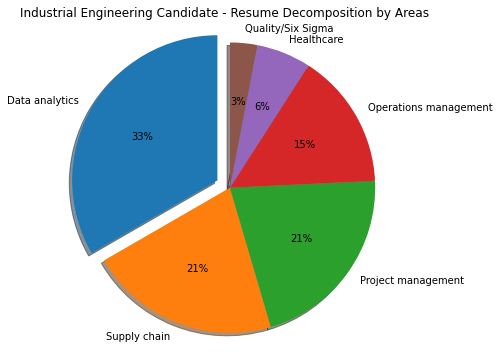

In [22]:
pie = plt.figure(figsize=(6,6))
plt.pie(summary['score'], labels=summary.index, explode = (0.1,0,0,0,0,0), autopct='%1.0f%%',shadow=True,startangle=90)
plt.title('Industrial Engineering Candidate - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()

In [4]:
from resume_parser import resumeparse
#data = resumeparse.read_file('Nashit.pdf')


OSError: [E053] Could not read config file from C:\Users\s_nas\AppData\Local\Programs\Python\Python311\Lib\site-packages\resume_parser\degree\model\config.cfg

In [3]:
import spacy
spacy.__version__

'3.7.2'

In [5]:
from pyresparser import ResumeParser
import warnings

In [6]:
warnings.filterwarnings("ignore", category=UserWarning)

In [7]:
data = ResumeParser("Nashit.pdf").get_extracted_data()


OSError: [E053] Could not read config file from C:\Users\s_nas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyresparser\config.cfg

In [13]:
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
#from io import StringIO

def extract_text_from_pdf(pdf_path):
    with open('Nashit.pdf', 'rb') as fh:
        # iterate over all pages of PDF document
        for page in PDFPage.get_pages(fh, caching=True, check_extractable=True):
            # creating a resoure manager
            resource_manager = PDFResourceManager()
            
            # create a file handle
            fake_file_handle = fh.StringIO()
            
            # creating a text converter object
            converter = TextConverter(
                                resource_manager, 
                                fake_file_handle, 
                                codec='utf-8', 
                                laparams=LAParams()
                        )

            # creating a page interpreter
            page_interpreter = PDFPageInterpreter(
                                resource_manager, 
                                converter
                            )

            # process current page
            page_interpreter.process_page(page)
            
            # extract text
            text = fake_file_handle.getvalue()
            yield text

            # close open handles
            converter.close()
            fake_file_handle.close()

# calling above function and extracting text
for page in extract_text_from_pdf('Nashit.pdf'):
    text += ' ' + page

AttributeError: '_io.BufferedReader' object has no attribute 'StringIO'

In [14]:
from pyresparser import ResumeParser
data = ResumeParser('Nashit.pdf').get_extracted_data()

OSError: [E053] Could not read config file from C:\Users\s_nas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyresparser\config.cfg